# Image Comparison using Color Histogram

Text(0.5, 1.0, 'Image 2')

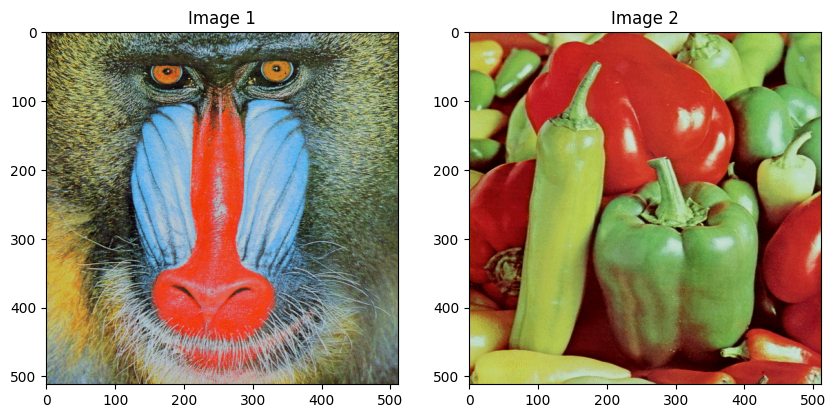

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Standard Images/mandril_color.tif')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)

image2=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Standard Images/peppers_color.tif')
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(10,10))
fig.add_subplot(121)
plt.imshow(image1)
plt.title("Image 1")

fig.add_subplot(122)
plt.imshow(image2)
plt.title("Image 2")

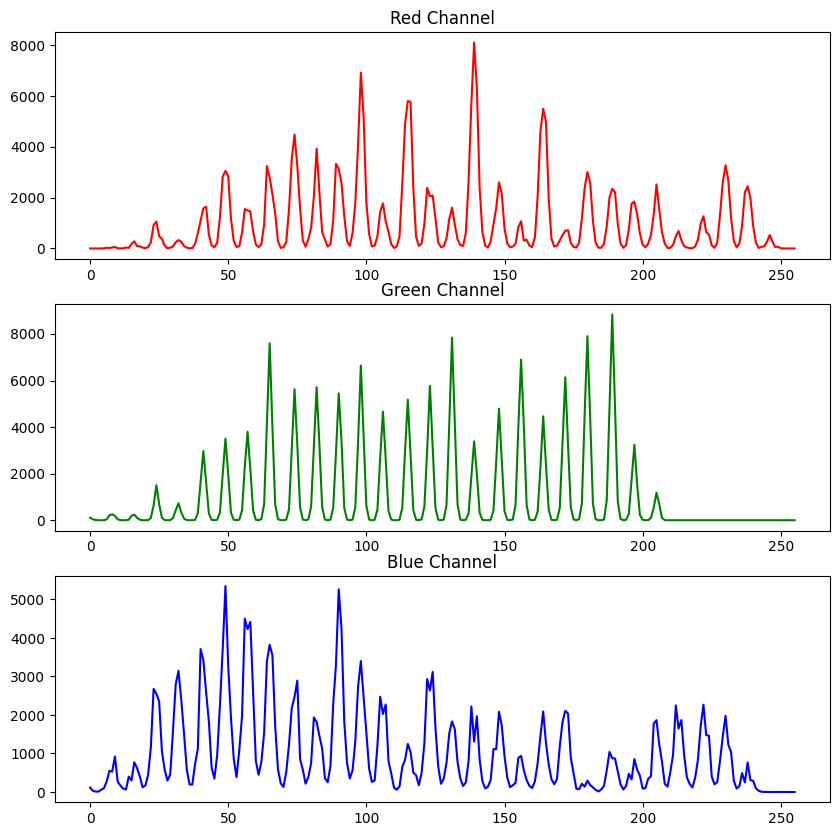

In [ ]:
#plotting the separate color histograms
#for image1
fig=plt.figure(figsize=(10,10))

#format: image, color channel, mask, bin size(256=8 bit values),range
red1=cv2.calcHist([image1],[0],None,[256],[0,256])
green1=cv2.calcHist([image1],[1],None,[256],[0,256])
blue1=cv2.calcHist([image1],[2],None,[256],[0,256])

plt.subplot(311)
plt.title("Red Channel")
plt.plot(red1,color='r')

plt.subplot(312)
plt.title("Green Channel")
plt.plot(green1,color='g')

plt.subplot(313)
plt.title("Blue Channel")
plt.plot(blue1,color='b')

Text(0.5, 1.0, 'Image 1 Color Histogram')

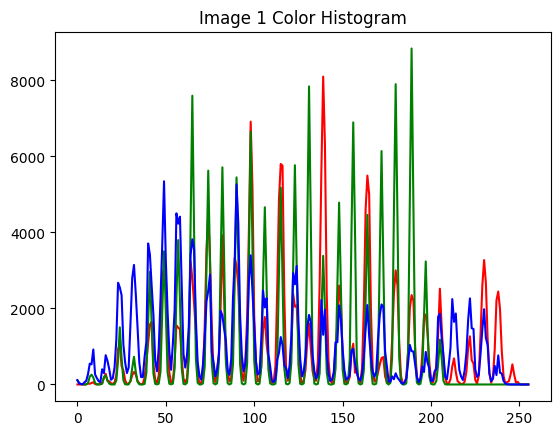

In [ ]:
plt.plot(red1,color='r')
plt.plot(green1,color='g')
plt.plot(blue1,color='b')
plt.title("Image 1 Color Histogram")

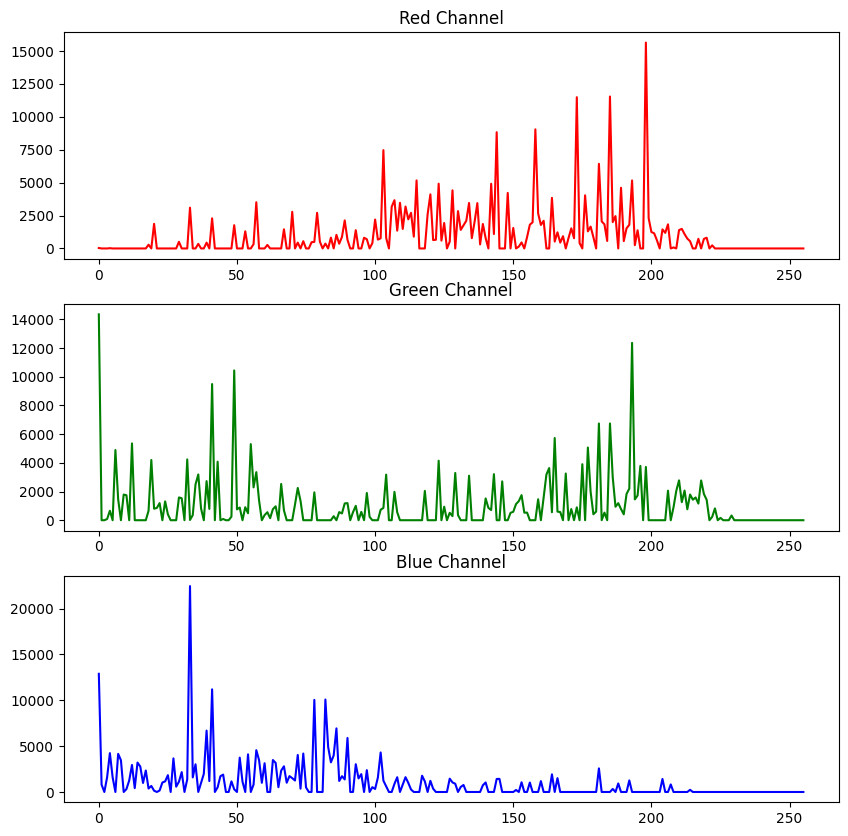

In [ ]:
#for image2
fig=plt.figure(figsize=(10,10))

#format: image, color channel, mask, bin size(256=8 bit values),range
red2=cv2.calcHist([image2],[0],None,[256],[0,256])
green2=cv2.calcHist([image2],[1],None,[256],[0,256])
blue2=cv2.calcHist([image2],[2],None,[256],[0,256])

plt.subplot(311)
plt.title("Red Channel")
plt.plot(red2,color='r')

plt.subplot(312)
plt.title("Green Channel")
plt.plot(green2,color='g')

plt.subplot(313)
plt.title("Blue Channel")
plt.plot(blue2,color='b')

Text(0.5, 1.0, 'Image 2 Color Histogram')

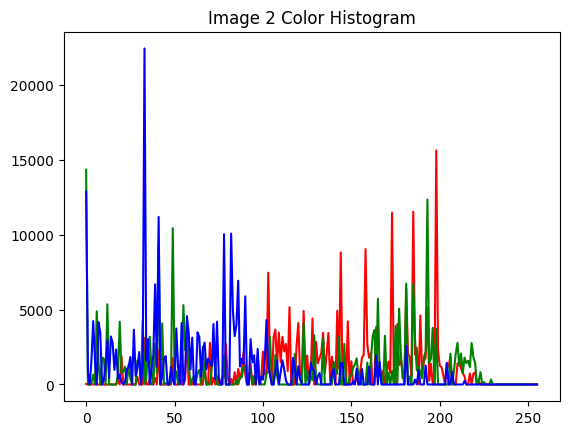

In [ ]:
plt.plot(red2,color='r')
plt.plot(green2,color='g')
plt.plot(blue2,color='b')
plt.title("Image 2 Color Histogram")

In [ ]:
#comparing the 2 histograms using correlation, chi-square and intersection

#for correlation
#correlation= (summation of intensities of(H1(I)-H1mean)*(H2(I)-H2mean) / sqrt(square of the product of the summation of each of the 2 from the numerator))
#values closer to 1 are similar

corr_blue=cv2.compareHist(blue1,blue2,cv2.HISTCMP_CORREL)
corr_green=cv2.compareHist(green1,green2,cv2.HISTCMP_CORREL)
corr_red=cv2.compareHist(red1,red2,cv2.HISTCMP_CORREL)

print("Correlation for Blue Channel:",corr_blue)
print("Correlation for Green Channel:",corr_green)
print("Correlation for Red Channel:",corr_red)
print("")

#for chi-square
#chi-square=(summation of intensities(H1(I)-H2(I))**2 / H1(I))
#similar histograms have lower values

chi_blue=cv2.compareHist(blue1,blue2,cv2.HISTCMP_CHISQR)
chi_green=cv2.compareHist(green1,green2,cv2.HISTCMP_CHISQR)
chi_red=cv2.compareHist(red1,red2,cv2.HISTCMP_CHISQR)

print("Chi-Square for Blue Channel:",chi_blue)
print("Chi-Square for Green Channel:",chi_green)
print("Chi-Square for Red Channel:",chi_red)
print("")

#for intersection
#intersection=summation of intensities (min(H1(I),H2(I)))
#higher values indicate more overlap between the histograms
int_blue=cv2.compareHist(blue1,blue2,cv2.HISTCMP_INTERSECT)
int_green=cv2.compareHist(green1,green2,cv2.HISTCMP_INTERSECT)
int_red=cv2.compareHist(red1,red2,cv2.HISTCMP_INTERSECT)

print("Intersection for Blue Channel:",int_blue)
print("Intersection for Green Channel:",int_green)
print("Intersection for Red Channel:",int_red)
print("")

#for bhattacharyya distance
#distance=(sqrt(1-(sum of intensities(H1(I)xH2(I)) / (sqrt(H1 * H2* N**2)) )))
#values closer to 0 means that the histograms are more similar
bhat_blue=cv2.compareHist(blue1,blue2,cv2.HISTCMP_BHATTACHARYYA)
bhat_green=cv2.compareHist(green1,green2,cv2.HISTCMP_BHATTACHARYYA)
bhat_red=cv2.compareHist(red1,red2,cv2.HISTCMP_BHATTACHARYYA)

print("Bhattacharyya Distance for Blue Channel:",bhat_blue)
print("Bhattacharyya Distance for Green Channel:",bhat_green)
print("Bhattacharyya Distance for Red Channel:",bhat_red)
print("")

#total values of the three
total_corr=(corr_blue+corr_green+corr_red)/3
total_chi=(chi_blue+chi_green+chi_red)/3
total_int=(int_blue+int_green+int_red)/3
total_bhat=(bhat_blue+bhat_green+bhat_red)/3

print("Total Correlation between the 2 Images:",total_corr)
print("Total Chi-Square between the 2 Images:",total_chi)
print("Total Intersection between the 2 Images:",total_int)
print("Total Bhattacharyya Distance between the 2 Images:",total_bhat)

Correlation for Blue Channel: 0.16789796623281789
Correlation for Green Channel: 0.019370924140348546
Correlation for Red Channel: 0.0352669080314742

Chi-Square for Blue Channel: 3598490.4675260214
Chi-Square for Green Channel: 166537909.19583902
Chi-Square for Red Channel: 11197979.403763141

Intersection for Blue Channel: 94602.0
Intersection for Green Channel: 67743.0
Intersection for Red Channel: 85776.0

Bhattacharyya Distance for Blue Channel: 0.6411394063408357
Bhattacharyya Distance for Green Channel: 0.7469591925637074
Bhattacharyya Distance for Red Channel: 0.6753236848204305

Total Correlation between the 2 Images: 0.07417859946821355
Total Chi-Square between the 2 Images: 60444793.02237606
Total Intersection between the 2 Images: 82707.0
Total Bhattacharyya Distance between the 2 Images: 0.6878074279083245
